Work from last week lab to get value for "h"

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import chi2
import math


def f(h):
  df = 7
  alpha = 0.005

  rhs = df*math.log(h)/(h-1)

  lhs = df*h*math.log(h)/(h-1)

  p_h = chi2.cdf(rhs, df) - chi2.cdf(lhs, df)

  return p_h + alpha - 1

def bisection(a,b,tol):
  xl = a 
  xr = b
  while (np.abs(xl-xr)>= tol):
    c = (xl+xr)/2.0
    prod = f(xl)*f(c)
    if prod > tol:
      xl = c
    else:
      if prod < tol:
        xr = c 
  return c 

answer = bisection(0.0001,0.9999,1e-10)
print ("Bisection Method Gives Root at x =" , answer)
# from this point, we got h = 0.037941856442473346

h = 0.037941856442473346

Bisection Method Gives Root at x = 0.037941856442473346


Getting the S^2 Unbiased Chart


In [37]:
def getBeta(sigma_0, sigma_1, h, n):
  h1 = (n-1)*h*np.log(h)/(h-1)
  h2 = (n-1)*np.log(h)/(h-1)
  LCL = sigma_0**2 *h1 / (n-1)
  UCL = sigma_0**2 *h2 / (n-1)
  Lower = (n-1)* LCL / sigma_1**2
  Upper = (n-1)* UCL / sigma_1**2

  Upper_cdf = chi2.cdf(Upper, n-1)
  Lower_cdf = chi2.cdf(Lower, n-1)

  return (Upper_cdf- Lower_cdf)


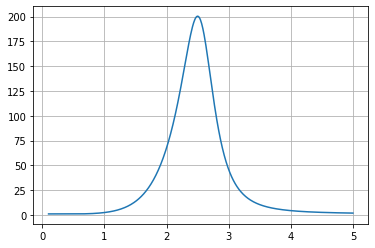

0.7679225849989352


In [39]:
sigma_0 = 2.5
n=8
sigma_1_array = np.linspace(0.1, 5.0, num=500)
ARL_List_Unbias = []

for sigma_1 in sigma_1_array:
  ARL_List_Unbias.append(1/(1-getBeta(sigma_0, sigma_1, h , n)))

plt.plot(sigma_1_array, ARL_List_Unbias)
plt.grid()
plt.show()

print(getBeta(2.5, 4, h ,n)) 

Getting the S^2 Biased Chart

In [31]:
def controlLimits(sigma_0, n, alpha):
  UCL = sigma_0**2 * chi2.ppf(alpha/2,n-1) / (n-1)
  LCL = sigma_0**2 * chi2.ppf(1- (alpha/2),n-1) / (n-1)
  return LCL, UCL

In [32]:
sigma_0 = 2.5
n = 8
alpha = 0.005
LCL, UCL = controlLimits(sigma_0, n, alpha)

In [33]:
def getBetaBias(LCL, UCL, sigma_1, n):
  Lower = (n-1)* LCL / sigma_1**2
  Upper = (n-1)* UCL / sigma_1**2

  Upper_cdf = chi2.cdf(Upper, n-1)
  Lower_cdf = chi2.cdf(Lower, n-1)

  return (Upper_cdf- Lower_cdf)

In [34]:
getBetaBias(LCL, UCL, 4 , n)

-0.7179691606012809

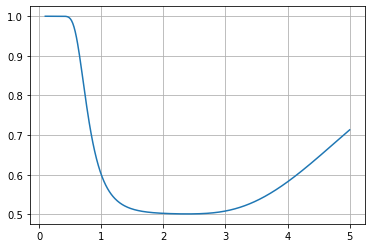

In [35]:
sigma_1_array = np.linspace(0.1, 5.0, num=500)
ARL_List_Biased= []
for sigma_1 in sigma_1_array:
  ARL_List_Biased.append(1/(1-getBetaBias(LCL, UCL, sigma_1 ,n)))

plt.plot(sigma_1_array, ARL_List_Biased)
plt.grid()
plt.show()